In [1]:
# -*- coding:UTF-8 -*- ＃
# 导入模块
import sys
import time
import math
import random
import numpy as np
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


sys.path.append(r"C:\Users\zhang\Desktop\exeserise")
import mymodule as MYD

# 二维高斯分布

In [2]:
def CalculationMFS(X):
    sumX=X[0];
    for i in range(1,len(X)):
        sumX=sumX+X[i];
    mean=sumX/len(X);
    VAR=math.pow((X[0]-mean),2)
    for j in range(1,len(X)):
        VAR=VAR+math.pow((X[j]-mean),2);
    VAR=VAR/len(X);
    Bar=math.sqrt(VAR);
    return mean,VAR,Bar;

def Zvalue(u1,u2,s1,s2,p,points):
    Z=[];
    for i in range(0,len(points)):
        fenmu=2*math.pi*s1*s2*math.sqrt(1-p*p);
        fenzi=(math.pow((points[i][0]-u1),2)/math.pow(s1,2))-(2*p*(points[i][0]-u1)*(points[i][1]-u2)/(u1*u2))+(math.pow((points[i][1]-u2),2)/math.pow(s2,2))
        expfenzi=math.exp(-0.5*fenzi/(1-p*p))
        tempz=expfenzi/fenmu
        Z.append(tempz)
    return Z;

def COVM(u1,u2,points):
    X0=points[:,0]; X1=points[:,1];
    SUM=0;
    for i in range(0,len(X0)):
        for j in range(0,len(X1)):
            SUM=SUM+(X0[i]-u1)*(X1[j]-u2)
    COV=SUM/(len(X0)*len(X1))
    return COV;

def RelationP(COV,VAR1,VAR2):
    P=COV/math.sqrt(VAR1*VAR2)
    return P;

def ZFclass(X,Y):
    zheng=[]; fu=[];
    for i in range(0,len(X)):
        if(Y[i]>0):
            zheng.append(X[i])
        else:
            fu.append(X[i])
    zheng=np.array(zheng)
    fu=np.array(fu)
    return zheng,fu;

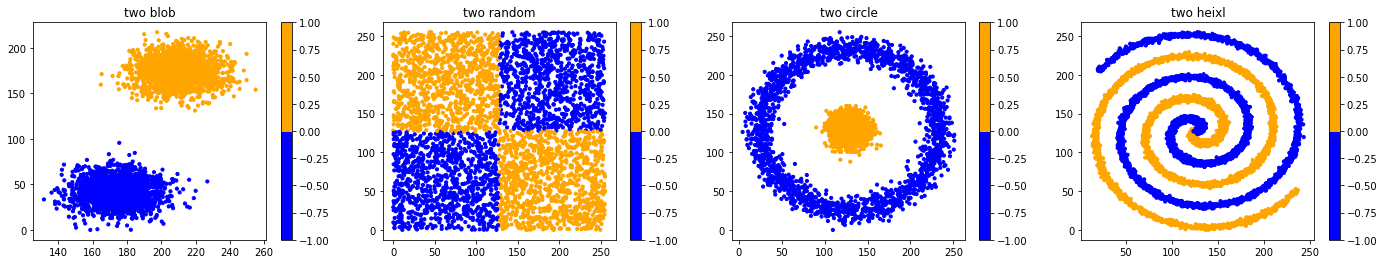

In [3]:
n_samples=4000
XB,yb=MYD.makeblods(n_samples)
XR,yr=MYD.makerandoms(n_samples)
XC,yc=MYD.makecircles(n_samples)
XH,yh=MYD.makeHelixs(n_samples)
XAS = [XB, XR, XC,XH]
YAS=[yb,yr,yc,yh]

cor = ListedColormap(['Blue', 'Orange'])
titlename=['two blob','two random','two circle','two heixl']
cmap=[cor,cor,cor,cor]
MYD.DrawManyChart(XAS,YAS,cmap,24,4,titlename,10,1,4)

[210.24026681479845, 173.6237174709089, 158.343867453253, 172.05269890002194, 5.6335524809007579e-19]
[174.61068469931089, 41.745129698098154, 168.83690939040645, 165.55197523475158, 4.3672562277501104e-19]
[128.06877674349118, 126.65207646389588, 5362.807354432077, 5449.418154433293, -4.1944841187391094e-19]
[124.72664449029773, 125.94274870209782, 5613.2821418594285, 5408.37991296333, -6.725687072192212e-19]
[129.16588190222529, 128.87532801080772, 123.92775336931994, 124.24195125722804, 1.717846738470197e-19]
[128.99288263432265, 129.11341263378034, 5485.616606146993, 5486.227563159336, -1.3553089314411682e-20]
[123.5514186140241, 119.87014729877049, 2563.654126277549, 3187.8146170450777, -2.0207186041485761e-19]
[131.48775352179808, 135.21074031445963, 2567.7002925838306, 3187.479256514957, -2.7103077793334062e-19]


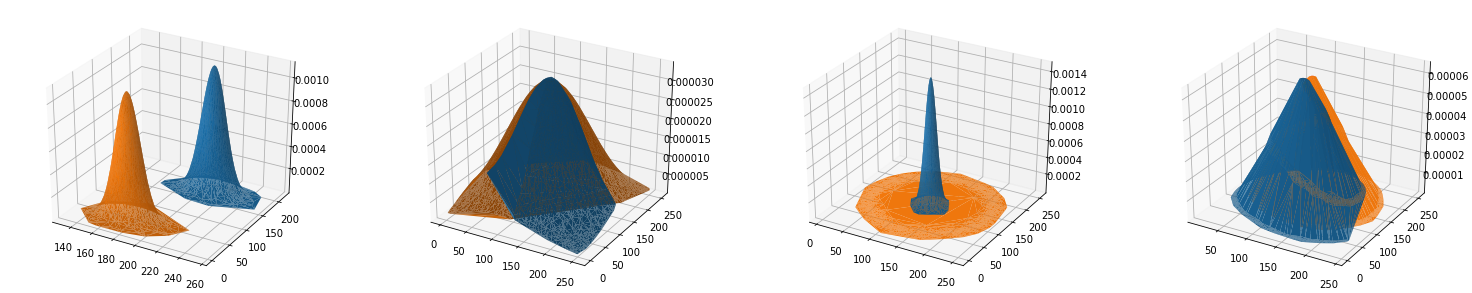

In [4]:
zhenglabel=[]; fulabel=[];
fig = plt.figure(figsize=(26,5))
for i in range(0,len(XAS)):
    zheng,fu=ZFclass(XAS[i],YAS[i])
    Xxmean,Xxvar,XxBar=CalculationMFS(zheng[:,0])
    Xymean,Xyvar,XyBar=CalculationMFS(zheng[:,1])
    Zlabelz=Zvalue(Xxmean,Xymean,XxBar,XyBar,0.5,zheng)
    XFxmean,XFxvar,XFxBar=CalculationMFS(fu[:,0])
    XFymean,XFyvar,XFyBar=CalculationMFS(fu[:,1])
    ZlabelF=Zvalue(XFxmean,XFymean,XFxBar,XFyBar,0.5,fu)
    
    COVzheng=COVM(Xxmean,Xymean,zheng)
    COVfu=COVM(XFxmean,XFymean,fu)
    
    COVMzheng=[Xxvar,COVzheng,COVzheng,Xyvar]
    COVMFU=[XFxvar,COVfu,COVfu,XFyvar]
    
    Pzheng=RelationP(COVzheng,Xxvar,Xyvar)
    Pfu=RelationP(COVfu,XFxvar,XFyvar)
    
    zhengxishu=[Xxmean,Xymean,Xxvar,Xyvar,Pzheng]
    fuxishu=[XFxmean,XFymean,XFxvar,XFyvar,Pfu]
    
    print(zhengxishu)
    print(fuxishu)
    #zhenglabel.append(Zlabelz)
    #fulabel.append(ZlabelF);
    ax = fig.add_subplot(1,4,i+1, projection='3d')
    ax.plot_trisurf(zheng[:,0],zheng[:,1],Zlabelz)
    ax.plot_trisurf(fu[:,0],fu[:,1],ZlabelF);
    
plt.show()
    

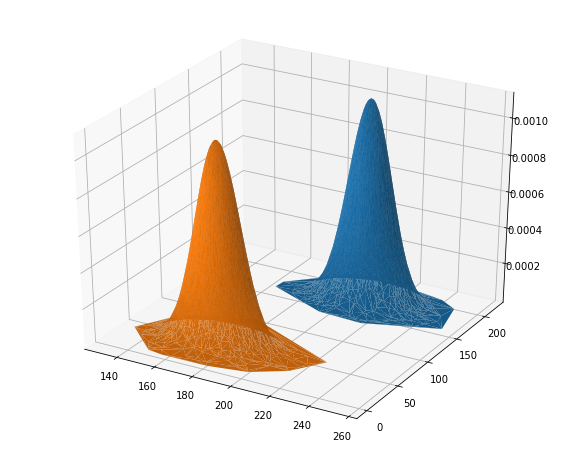

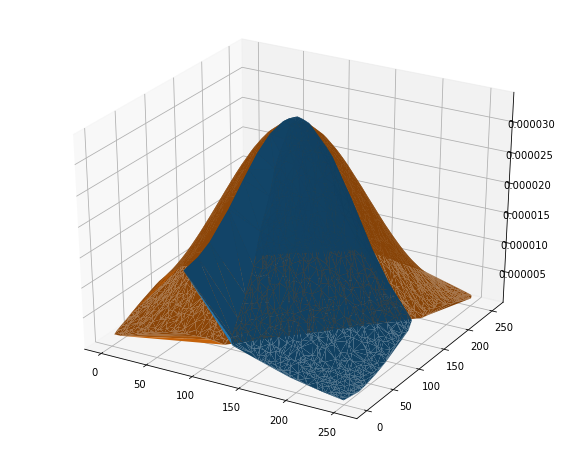

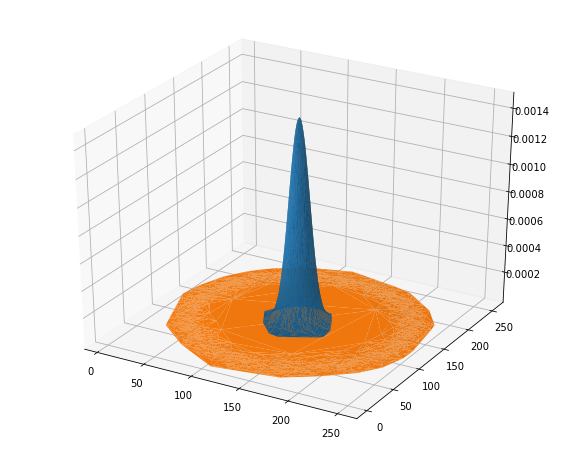

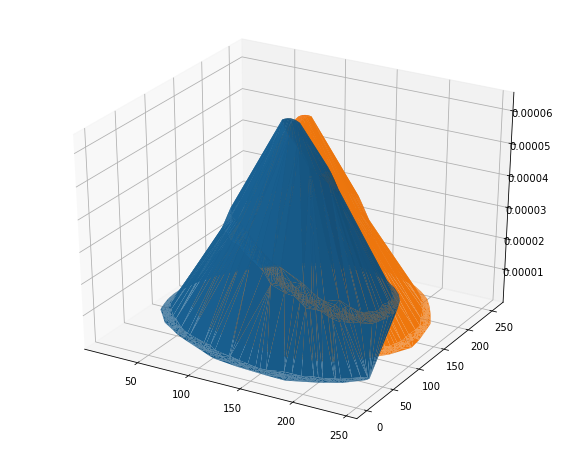

In [5]:
for i in range(0,len(XAS)):
    zheng,fu=ZFclass(XAS[i],YAS[i])
    Xxmean,Xxvar,XxBar=CalculationMFS(zheng[:,0])
    Xymean,Xyvar,XyBar=CalculationMFS(zheng[:,1])
    Zlabelz=Zvalue(Xxmean,Xymean,XxBar,XyBar,0.5,zheng)
    XFxmean,XFxvar,XFxBar=CalculationMFS(fu[:,0])
    XFymean,XFyvar,XFyBar=CalculationMFS(fu[:,1])
    ZlabelF=Zvalue(XFxmean,XFymean,XFxBar,XFyBar,0.5,fu)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    #ax.plot_surface(zheng[:,0],zheng[:,1],Zlabelz,rstride=2,cstride=1,cmap=plt.cm.coolwarm,alpha=0.8)
    #ax.plot_surface(fu[:,0],fu[:,1],ZlabelF,rstride=2,cstride=1,cmap=plt.cm.coolwarm,alpha=0.8)
    ax.plot_trisurf(zheng[:,0],zheng[:,1],Zlabelz)
    ax.plot_trisurf(fu[:,0],fu[:,1],ZlabelF);
    plt.show();

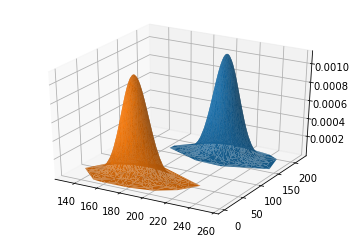

In [6]:
zhengXB,fuXB=ZFclass(XB,yb)
XBxmean,XBxvar,XBxBar=CalculationMFS(zhengXB[:,0])
XBymean,XByvar,XByBar=CalculationMFS(zhengXB[:,1])
Zlabel=Zvalue(XBxmean,XBymean,XBxBar,XByBar,0.5,zhengXB)

XBFxmean,XBFxvar,XBFxBar=CalculationMFS(fuXB[:,0])
XBFymean,XBFyvar,XBFyBar=CalculationMFS(fuXB[:,1])
ZlabelF=Zvalue(XBFxmean,XBFymean,XBFxBar,XBFyBar,0.5,fuXB)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(zhengXB[:,0],zhengXB[:,1],Zlabel)
ax.plot_trisurf(fuXB[:,0],fuXB[:,1],ZlabelF)
plt.show()

# 协方差矩阵